In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('air_prediction.csv')
df

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,wind_speed,wind_direc,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
0,基隆,基隆市,37,NaN,良好,1.2,0.24,41.7,40.3,6.0,...,1.1,89,2022/11/24 13:00:00,0.2,6,12,1,121.760056,25.129167,1
1,汐止,新北市,30,NaN,良好,1.8,0.22,28.4,28.6,6.0,...,2.4,21,2022/11/24 13:00:00,0.2,4,7,1,121.642300,25.067131,2
2,萬里,新北市,42,NaN,良好,0.3,0.21,43.2,45.5,16.0,...,2.5,73,2022/11/24 13:00:00,0.2,5,18,0,121.689881,25.179667,3
3,新店,新北市,25,NaN,良好,0.5,0.34,30.5,27.4,4.0,...,0.5,1,2022/11/24 13:00:00,0.3,1,6,0,121.537778,24.977222,4
4,土城,新北市,33,NaN,良好,NaN,0.40,NaN,28.7,NaN,...,1.5,269,2022/11/24 13:00:00,0.4,4,9,0,121.451861,24.982528,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,屏東(琉球),屏東縣,85,細懸浮微粒,普通,2.3,0.49,49.3,20.5,65.0,...,1.3,314,2022/11/24 13:00:00,0.4,29,46,1,120.377220,22.352220,204
82,宜蘭(壯圍),宜蘭縣,38,NaN,良好,0.0,0.22,42.3,41.4,9.0,...,0.5,232,2022/11/24 13:00:00,0.2,4,10,0,121.815708,24.765468,310
83,新北(樹林),新北市,47,NaN,良好,0.3,0.42,17.9,19.5,10.0,...,0,192,2022/11/24 13:00:00,0.4,7,10,0,121.383528,24.949028,311
84,臺南(學甲),臺南市,62,細懸浮微粒,普通,2.4,0.43,29.8,15.8,48.0,...,2.4,357,2022/11/24 13:00:00,0.5,19,52,1,120.183397,23.236881,312


In [2]:
#資料前處理
#測站編號為唯一值
print(np.unique(df['siteid'].values).size)

86


In [3]:
#將其設定為index
df = df.set_index('siteid')
df

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,no,wind_speed,wind_direc,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude
siteid,,,,,,,,,,,,,,,,,,,,,
1,基隆,基隆市,37,NaN,良好,1.2,0.24,41.7,40.3,6.0,...,1.1,1.1,89,2022/11/24 13:00:00,0.2,6,12,1,121.760056,25.129167
2,汐止,新北市,30,NaN,良好,1.8,0.22,28.4,28.6,6.0,...,2.3,2.4,21,2022/11/24 13:00:00,0.2,4,7,1,121.642300,25.067131
3,萬里,新北市,42,NaN,良好,0.3,0.21,43.2,45.5,16.0,...,1.3,2.5,73,2022/11/24 13:00:00,0.2,5,18,0,121.689881,25.179667
4,新店,新北市,25,NaN,良好,0.5,0.34,30.5,27.4,4.0,...,2.9,0.5,1,2022/11/24 13:00:00,0.3,1,6,0,121.537778,24.977222
5,土城,新北市,33,NaN,良好,NaN,0.40,NaN,28.7,NaN,...,2.5,1.5,269,2022/11/24 13:00:00,0.4,4,9,0,121.451861,24.982528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,屏東(琉球),屏東縣,85,細懸浮微粒,普通,2.3,0.49,49.3,20.5,65.0,...,3.6,1.3,314,2022/11/24 13:00:00,0.4,29,46,1,120.377220,22.352220
310,宜蘭(壯圍),宜蘭縣,38,NaN,良好,0.0,0.22,42.3,41.4,9.0,...,0.4,0.5,232,2022/11/24 13:00:00,0.2,4,10,0,121.815708,24.765468
311,新北(樹林),新北市,47,NaN,良好,0.3,0.42,17.9,19.5,10.0,...,11.2,0,192,2022/11/24 13:00:00,0.4,7,10,0,121.383528,24.949028


In [4]:
print(df.isnull().sum())


sitename        0
county          0
aqi             0
pollutant      59
status          0
so2             5
co              1
o3              6
o3_8hr          1
pm10            5
pm2.5           5
no2             5
nox             5
no              5
wind_speed      2
wind_direc      2
publishtime     0
co_8hr          0
pm2.5_avg       0
pm10_avg        0
so2_avg         0
longitude       0
latitude        0
dtype: int64


In [5]:
df = df.drop(index=[67],axis=0)
#剩餘85筆
print(df.shape)

(85, 23)


In [6]:
#修補所有的缺失值
avg_so2 = df['so2'].mean()
avg_co = df['co'].mean()
avg_o3 = df['o3'].mean()
avg_o3_8hr = df['o3_8hr'].mean()
avg_pm10 = df['pm10'].mean()
avg_pm2 = df['pm2.5'].mean()
avg_no2 = df['no2'].mean()
avg_nox = df['nox'].mean()
avg_no = df['no'].mean()
avg_co_8hr = df['co_8hr'].mean()
avg_pm2_avg = df['pm2.5_avg'].mean()
avg_pm10_avg = df['pm10_avg'].mean()
avg_so2_avg = df['so2_avg'].mean()


df['so2'] = df['so2'].fillna(avg_so2)
df['co'] = df['co'].fillna(avg_co)
df['o3'] = df['o3'].fillna(avg_o3)
df['o3_8hr'] = df['o3_8hr'].fillna(avg_o3_8hr)
df['pm10'] = df['pm10'].fillna(avg_pm10)
df['pm2.5'] = df['pm2.5'].fillna(avg_pm2)
df['no2'] = df['no2'].fillna(avg_no2)
df['nox'] = df['nox'].fillna(avg_nox)
df['no'] = df['no'].fillna(avg_no)
df['co_8hr'] = df['co_8hr'].fillna(avg_co_8hr)
df['pm2.5_avg'] = df['pm2.5_avg'].fillna(avg_pm2_avg)
df['pm10_avg'] = df['pm10_avg'].fillna(avg_pm10_avg)
df['so2_avg'] = df['so2_avg'].fillna(avg_so2_avg)
print(df.isnull().sum())


sitename        0
county          0
aqi             0
pollutant      59
status          0
so2             0
co              0
o3              0
o3_8hr          0
pm10            0
pm2.5           0
no2             0
nox             0
no              0
wind_speed      2
wind_direc      2
publishtime     0
co_8hr          0
pm2.5_avg       0
pm10_avg        0
so2_avg         0
longitude       0
latitude        0
dtype: int64


In [15]:
#將status文字形式轉化成數值，良好:1，普通:0
df['良好'] = np.where(df['status']== '良好',1,0)
df['普通'] = np.where(df['status']== '普通',1,0)
df[['良好','普通']]

,良好,普通
siteid,,
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
204,0,1
310,1,0
311,1,0


In [17]:
#良好和普通分組的空氣指標之數量和平均值
#發現整體品質沒有很好
#而且分數越低分空氣品質越好
print(df.groupby(df['status'])['aqi'].size())


status
對敏感族群不健康     3
普通          23
良好          59
Name: aqi, dtype: int64


In [18]:
df['status'].value_counts()#與上述一樣的答案

良好          59
普通          23
對敏感族群不健康     3
Name: status, dtype: int64

In [19]:
df.groupby(df['status'])['aqi'].mean()

status
對敏感族群不健康    108.333333
普通           77.782609
良好           33.186441
Name: aqi, dtype: float64

        良好  普通
county        
南投縣      2   1
嘉義市      0   1
嘉義縣      2   0
基隆市      1   0
宜蘭縣      3   0
屏東縣      2   2
彰化縣      4   1
新北市     12   0
新竹市      1   0
新竹縣      2   0
桃園市      6   0
澎湖縣      1   0
臺中市      5   0
臺北市      7   0
臺南市      0   6
臺東縣      2   0
花蓮縣      1   0
苗栗縣      3   0
連江縣      1   0
金門縣      1   0
雲林縣      3   1
高雄市      0  11


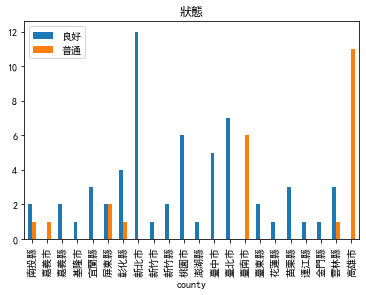

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False


df_group_by_status = df[['良好', '普通']].groupby(df['county']).sum()
print(df_group_by_status)
df_group_by_status.plot(kind='bar')
plt.title('狀態')
plt.show()

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

distances = np.array([3.7,2.7,0.6,1.9,0.6,0.3,4.3])
prices = np.array([39,44,72,51,65,57,31])

x = pd.DataFrame(distances,columns=['捷運站距離(公里)'])
y = pd.DataFrame(prices,columns=['房價(萬/坪)'])['房價(萬/坪)']

linear_reg = LinearRegression()

linear_reg.fit(x,y)

x_new = float(input("請輸入捷運站距離(公里): "))
x_new_pd = pd.DataFrame(np.array([x_new]),columns=['捷運站距離(公里)'])

predict_price = linear_reg.predict(x_new_pd)

print("房價約為:",np.around(predict_price).astype(int),"(萬/坪)")

請輸入捷運站距離(公里): 2.5
房價約為: [47] (萬/坪)


In [26]:
x

,捷運站距離(公里)
0,3.7
1,2.7
2,0.6
3,1.9
4,0.6
5,0.3
6,4.3


In [27]:
y

0    39
1    44
2    72
3    51
4    65
5    57
6    31
Name: 房價(萬/坪), dtype: int32